In [4]:
# importation of libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline 
import datetime
import warnings
warnings.filterwarnings('ignore')

In [5]:
config = {
    'figure.figsize': (14, 8),
    'figure.facecolor': '#F0F8FF',
    'figure.titlesize': 'medium',
    'figure.dpi': 50,
    'figure.edgecolor': 'green',
    'figure.frameon': True,

    "figure.autolayout": True,

    'axes.facecolor': '#F5F5DC',
    'axes.titlesize': 25,
    "axes.titleweight": 'normal',
    "axes.titlecolor": 'Olive',
    'axes.edgecolor': 'pink',

    "axes.linewidth": 2,
    "axes.grid": True,
    'axes.titlelocation': 'center',
    "axes.labelsize": 20,
    "axes.labelpad": 2,
    'axes.labelweight': 1,
    "axes.labelcolor": 'Olive',
    "axes.axisbelow": False,
    'axes.xmargin': .2,
    "axes.ymargin": .2,

    "xtick.bottom": True,
    'xtick.color': '#A52A2A',
    "ytick.left": True,
    'ytick.color': '#A52A2A',

    
    'grid.color': 'green',
    'grid.linestyle': '--',
    'grid.linewidth': .5,
    'grid.alpha': .3,

    'legend.loc': 'best',
    'legend.facecolor': 'NavajoWhite',
    'legend.edgecolor': 'pink',
    'legend.shadow': True,
    'legend.fontsize': 20,

   
    'font.size': 14,
}

# Apply the configuration to Matplotlib
plt.rcParams.update(config)



<div>
<h1 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px">Data Information</h1>
<p>This data was collected via IoT devices from June 25th, 2019 to April 14th, 2020 which was updated every 15 minutes.</p>

<div style="display:flex">
<div>
<b>Overview</b>
<ul>
    <li>OTI- Oil Temperature Indicator</li>
    <li>WTI- Winding Temperature Indicator</li>
    <li>ATI- Ambient Temperature Indicator</li>
    <li>OLI- Oil Level Indicator</li>
    <li>OTIA- Oil Temperature Indicator Alarm OTIT</li>
    <li>Oil Temperature Indicator Trip</li>
    <li>MOG_A- Magnetic oil gauge indicator</li>
</ul>
</div>
<div>
<b>CurrentVoltage</b>
<ul>
    <li>VL1- Phase Line 1</li>
    <li>VL2- Phase Line 2</li>
    <li>VL3- Phase Line 3</li>
    <li>IL1- Current Line 1</li>
    <li>IL2- Current Line 2</li>
    <li>IL3- Current Line 3</li>
    <li>VL12- Voltage line 1 2</li>
    <li>VL23- Voltage line 2 3</li>
    <li>VL31- Voltage line 3 1</li>
    <li>INUT- Neutral Current</li>
</ul>
</div>
</div>
</div>

In [6]:
# Transformer data overview
tf = pd.read_csv('Overview.csv')
display(tf.shape) 
tf.head()

(20316, 8)

DeviceTimeStamp  OTI  WTI  ATI   OLI  OTI_A  OTI_T  MOG_A
0  2019-06-25T13:06  0.0  0.0  0.0  37.0    0.0    0.0    0.0
1  2019-06-25T13:09  0.0  0.0  0.0  37.0    0.0    0.0    0.0
2  2019-06-27T10:49  0.0  0.0  0.0  38.0    0.0    0.0    0.0
3  2019-06-27T10:51  0.0  0.0  0.0  38.0    0.0    0.0    0.0
4  2019-06-27T10:52  0.0  0.0  0.0  39.0    0.0    0.0    0.0

In [7]:
# Converting to datetime datatype
tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

tf.head()

DeviceTimeStamp  OTI  WTI  ATI   OLI  OTI_A  OTI_T  MOG_A
0 2019-06-25 13:06:00  0.0  0.0  0.0  37.0    0.0    0.0    0.0
1 2019-06-25 13:09:00  0.0  0.0  0.0  37.0    0.0    0.0    0.0
2 2019-06-27 10:49:00  0.0  0.0  0.0  38.0    0.0    0.0    0.0
3 2019-06-27 10:51:00  0.0  0.0  0.0  38.0    0.0    0.0    0.0
4 2019-06-27 10:52:00  0.0  0.0  0.0  39.0    0.0    0.0    0.0

In [8]:
# transformer current and voltage overview
current_voltage_data = pd.read_csv('CurrentVoltage.csv')
display(current_voltage_data.shape)
current_voltage_data.head()

(19352, 11)

DeviceTimeStamp    VL1    VL2    VL3  IL1  IL2  IL3  VL12  VL23  VL31  \
0  2019-06-25T13:06    0.0    0.0    0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1  2019-06-27T10:49  238.7  238.7  238.8  0.0  0.0  0.0   0.0   0.0   0.0   
2  2019-06-27T10:51  238.4  238.5  238.5  0.0  0.0  0.0   0.0   0.0   0.0   
3  2019-06-27T10:52  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   
4  2019-06-27T10:52  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   

   INUT  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Converting to datetime datatype
</span>

In [9]:
# Converting to datetime datatype
current_voltage_data['DeviceTimeStamp'] = pd.to_datetime(current_voltage_data['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

current_voltage_data.head()

DeviceTimeStamp    VL1    VL2    VL3  IL1  IL2  IL3  VL12  VL23  VL31  \
0 2019-06-25 13:06:00    0.0    0.0    0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1 2019-06-27 10:49:00  238.7  238.7  238.8  0.0  0.0  0.0   0.0   0.0   0.0   
2 2019-06-27 10:51:00  238.4  238.5  238.5  0.0  0.0  0.0   0.0   0.0   0.0   
3 2019-06-27 10:52:00  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   
4 2019-06-27 10:52:00  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   

   INUT  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Merge both dataframes along DeviceTimeStamp
</span>

In [10]:
# Merge both dataframes along DeviceTimeStamp
transformer = pd.merge(tf, current_voltage_data, on='DeviceTimeStamp', how='outer')


In [11]:
transformer['DeviceTimeStamp'] = pd.to_datetime(transformer['DeviceTimeStamp'])
# Create new columns for year, month, day, hour, minute, second
transformer['Year'] = transformer['DeviceTimeStamp'].dt.year
transformer['Month'] = transformer['DeviceTimeStamp'].dt.month
transformer['Day'] = transformer['DeviceTimeStamp'].dt.day
transformer['Hour'] = transformer['DeviceTimeStamp'].dt.hour
transformer['Minute'] = transformer['DeviceTimeStamp'].dt.minute
transformer['Second'] = transformer['DeviceTimeStamp'].dt.second
transformer.sample(5)

DeviceTimeStamp   OTI  WTI   ATI    OLI  OTI_A  OTI_T  MOG_A    VL1  \
510   2019-06-27 15:22:00  34.0  0.0  35.0   39.0    0.0    0.0    0.0  237.8   
12185 2019-11-07 18:30:00  29.0  0.0  28.0   88.0    0.0    0.0    0.0  231.0   
4159  2019-08-01 19:30:00  32.0  0.0  30.0   40.0    0.0    0.0    1.0  225.8   
15432 2020-01-21 18:45:00  23.0  1.0  20.0  100.0    0.0    0.0    0.0  244.8   
16754 2020-02-04 23:15:00  22.0  1.0  19.0  100.0    0.0    0.0    0.0  253.1   

         VL2  ...   VL12   VL23   VL31  INUT  Year  Month  Day  Hour  Minute  \
510    237.8  ...    0.0    0.0    0.0   0.0  2019      6   27    15      22   
12185  232.2  ...  401.7  399.9  399.7  34.3  2019     11    7    18      30   
4159   224.5  ...  390.1  389.8  393.5  43.4  2019      8    1    19      30   
15432  244.2  ...  423.4  421.2  424.0  36.8  2020      1   21    18      45   
16754  252.2  ...  437.8  435.5  438.0  23.0  2020      2    4    23      15   

       Second  
510         0  
12185       0  
4159        0  
15432       0  
16754       0  

[5 rows x 24 columns]

In [12]:
#data info
data_row_lenght=transformer.shape[0]
data_column_lenght = transformer.shape[1]
print("Number of rows are:",data_row_lenght)
print("Number of columns are:",data_column_lenght)

Number of rows are: 21361
Number of columns are: 24


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Transformer Parameter Visualization</span>

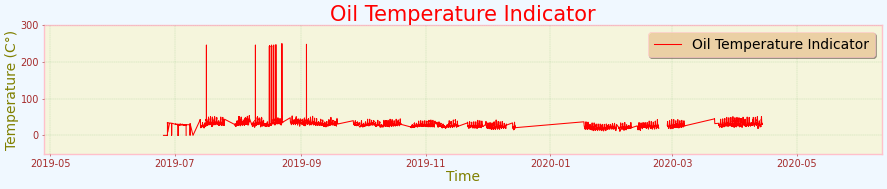

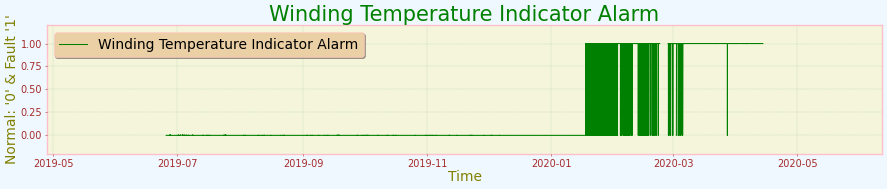

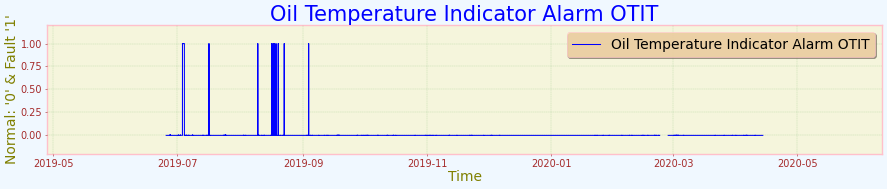

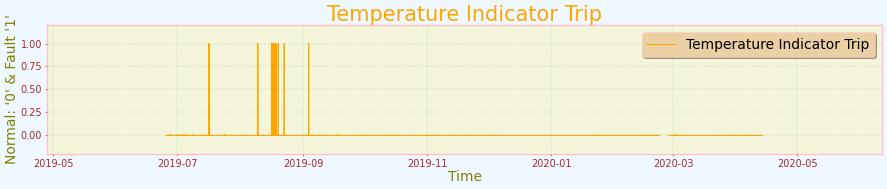

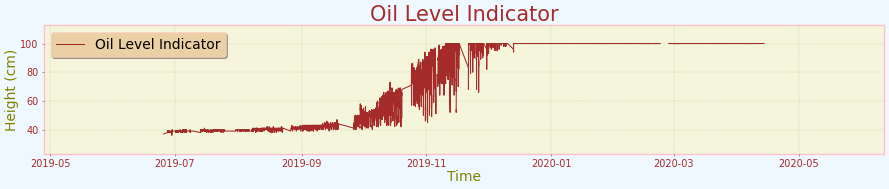

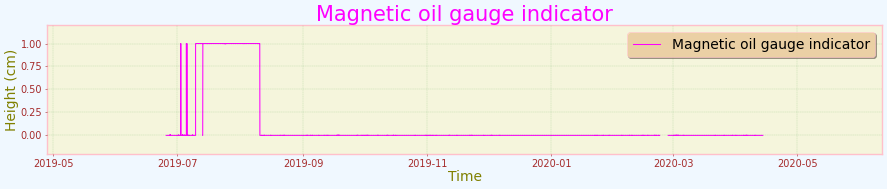

In [13]:
# visualization of data structure
title_fontsize = 30
xlabel_label = "Time"
ylabel_labels = {
    "OTI": "Temperature (C°)",
    "WTI": "Normal: '0' & Fault '1'",
    "OTI_A": "Normal: '0' & Fault '1'",
    "OTI_T": "Normal: '0' & Fault '1'",
    "OLI": "Height (cm)",
    "MOG_A": "Height (cm)"
}
fig_width, fig_height = 18, 4  # Adjust figure size as needed
signals = [
    ("OTI", "Oil Temperature Indicator", "red"),
    ("WTI", "Winding Temperature Indicator Alarm", "green"),
    ("OTI_A", "Oil Temperature Indicator Alarm OTIT", "blue"),
    ("OTI_T", "Temperature Indicator Trip", "orange"),
    ("OLI", "Oil Level Indicator", "brown"),
    ("MOG_A", "Magnetic oil gauge indicator", "magenta")
]
# Create and plot each time series with specific labels and colors
for signal_name, label, color in signals:
    plt.figure(figsize=(fig_width, fig_height))
    plt.plot(transformer.DeviceTimeStamp, transformer[signal_name], label=label, color=color)
    plt.title(f"{label}", fontsize=title_fontsize, color=color)
    plt.legend()
    plt.xlabel(xlabel_label)
    plt.ylabel(ylabel_labels[signal_name])
    plt.show()

<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Classified Data Visualization (OTI_A,OTI_T,MOG_A)</h3>

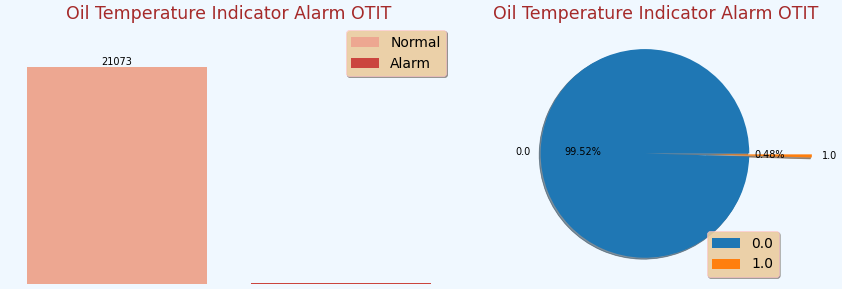

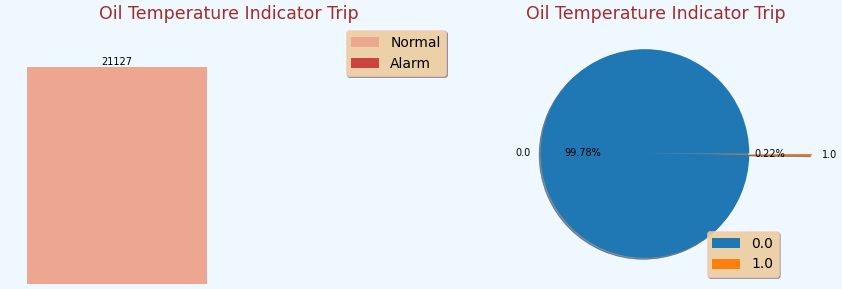

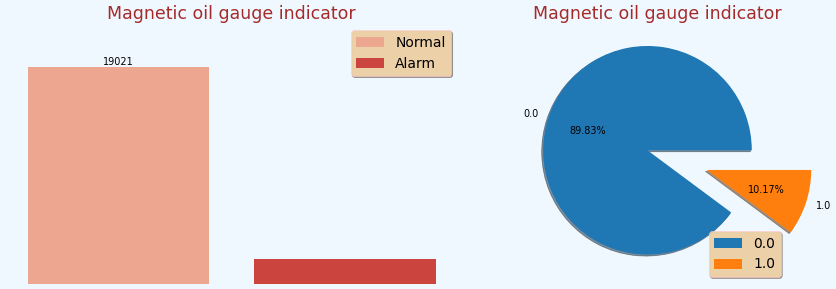

In [14]:
# The dataset contain three alarms which are listed below
# List of signals and their alarm states
signals = [
    ("OTI_A", "Oil Temperature Indicator Alarm OTIT", 'Reds', ['Normal', 'Alarm']),
    ("OTI_T", "Oil Temperature Indicator Trip", 'Reds', ['Normal', 'Alarm']),
    ("MOG_A", "Magnetic oil gauge indicator", 'Reds', ['Normal', 'Alarm'])
]

fig_width, fig_height = 18, 6  # Adjust figure size as needed

# Create a figure and subplots for each signal
for signal_name, title, palette, labels in signals:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))

    # Count plot (ax1)
    ax1 = sns.countplot(x=signal_name, data=transformer, palette=palette, ax=ax1,hue=signal_name,legend=False)
    ax1.bar_label(ax1.containers[0])
    ax1.set_title(title, color='brown')
    ax1.legend(labels=labels)
    ax1.axis('off')

    # Pie chart (ax2)
    ax2 = transformer[signal_name].value_counts().plot.pie(
        explode=[0.1, 0.5], autopct='%1.2f%%', shadow=True, ax=ax2,)
    ax2.set_title(label=title,color='brown')
    ax2.legend()
    ax2.axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Train Test Split</span>

<div style="font-weight:bold;color:green;font-size:18px">WORKING ON THE MAGNETIC FAULT ALARM DATA AS OUR DEPENDENT VAIRABLE</div>

In [15]:
X = transformer.drop(['DeviceTimeStamp','MOG_A'],axis=1).interpolate() #independent variables 
y = transformer['MOG_A'].ffill() #dependent vairable


X.head()

OTI  WTI  ATI   OLI  OTI_A  OTI_T     VL1     VL2    VL3  IL1  ...  VL12  \
0  0.0  0.0  0.0  37.0    0.0    0.0    0.00    0.00    0.0  0.0  ...   0.0   
1  0.0  0.0  0.0  37.0    0.0    0.0  119.35  119.35  119.4  0.0  ...   0.0   
2  0.0  0.0  0.0  38.0    0.0    0.0  238.70  238.70  238.8  0.0  ...   0.0   
3  0.0  0.0  0.0  38.0    0.0    0.0  238.40  238.50  238.5  0.0  ...   0.0   
4  0.0  0.0  0.0  39.0    0.0    0.0  239.90  240.00  240.0  0.0  ...   0.0   

   VL23  VL31  INUT  Year  Month  Day  Hour  Minute  Second  
0   0.0   0.0   0.0  2019      6   25    13       6       0  
1   0.0   0.0   0.0  2019      6   25    13       9       0  
2   0.0   0.0   0.0  2019      6   27    10      49       0  
3   0.0   0.0   0.0  2019      6   27    10      51       0  
4   0.0   0.0   0.0  2019      6   27    10      52       0  

[5 rows x 22 columns]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)
X_train.head()

OTI  WTI   ATI    OLI  OTI_A  OTI_T    VL1    VL2    VL3   IL1  ...  \
12880  26.0  0.0  26.0   97.0    0.0    0.0  245.7  244.4  243.1  39.1  ...   
13961  25.0  0.0  25.0  100.0    0.0    0.0  247.2  246.2  244.2  66.7  ...   
617    33.0  0.0  34.0   39.0    0.0    0.0  238.7  238.7  238.8   0.0  ...   
7449   40.0  0.0  35.0   41.0    0.0    0.0  236.7  234.9  236.3  83.6  ...   
3816   35.0  0.0  31.0   39.0    0.0    0.0  235.2  234.1  235.3  60.9  ...   

        VL12   VL23   VL31  INUT  Year  Month  Day  Hour  Minute  Second  
12880  424.2  422.1  424.0  19.8  2019     11   14     8       0       0  
13961  427.5  425.0  426.4  19.9  2019     12    1     9      10       0  
617      0.0    0.0    0.0   0.0  2019      6   28    11       4       0  
7449   407.9  407.2  410.3   7.2  2019      9    8    13       0       0  
3816   404.4  404.1  407.0  23.4  2019      7   24     8      45       0  

[5 rows x 22 columns]

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Normalizing the data</span>

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h1 style="color:white;background-color:Red;padding:2%;border-radius:150px 150px;font-size:3em;text-align:center">Model Implementation</h1>

<h2 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-family:Nexa;
           letter-spacing:0.5px">1. Random ForestClassifier</h2>

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # Import for plotting
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier


In [19]:
# Define the parameter grid to explore
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 5, 8],  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at each leaf node
}

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)


# Perform GridSearchCV
rf_grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)

# Train the model on the training set using GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Access the best model with tuned hyperparameters
rf_best_model = rf_grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_rf = rf_best_model.predict(X_test)

# Calculate training and testing accuracy using the best model
random_forest_train_accuracy = round(rf_best_model.score(X_train, y_train) * 100, 2)
random_forest_test_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

# Print the accuracy results
print(f"Training Accuracy with Hyperparameter Tuning: {random_forest_train_accuracy}%")
print(f"Testing Accuracy with Hyperparameter Tuning: {random_forest_test_accuracy}%")


Training Accuracy with Hyperparameter Tuning: 99.79%
Testing Accuracy with Hyperparameter Tuning: 99.84%


<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Classification Report</h3>

In [20]:
# Print classification report with clear formatting
print("\n\033[1mClassification Report:\033[0m")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3846
         1.0       0.99      0.99      0.99       427

    accuracy                           1.00      4273
   macro avg       1.00      0.99      1.00      4273
weighted avg       1.00      1.00      1.00      4273



<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; ; color:#FBFAFC;padding:5px ">Random Forest confusion matrix</h3>

<Figure size 450x350 with 0 Axes>

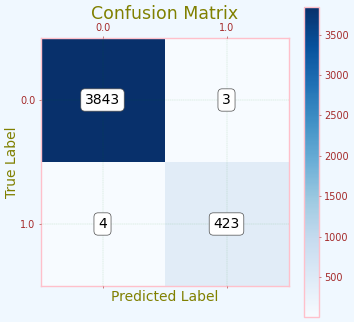

In [21]:
cm = confusion_matrix(y_test, y_pred_rf)

# Create and display the confusion matrix with informative labels and colormap
plt.figure(figsize=(9, 7))  # Adjust figure size as desired
plt.matshow(cm, cmap=plt.cm.Blues)  # Adjust colormap as desired
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=20, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.show()

<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Calculate Random Forest F1-score, recall, and precision</h3>

In [22]:
# Calculate F1-score, recall, and precision
from sklearn.metrics import f1_score, recall_score, precision_score

random_forest_f1 = f1_score(y_test, y_pred_rf, average='weighted')
random_forest_recall = recall_score(y_test, y_pred_rf, average='weighted')
random_forest_precision = precision_score(y_test, y_pred_rf, average='weighted')
# precision_scores.append(random_forest_precision)
# recall_scores.append(random_forest_recall)
# f1_scores.append(random_forest_f1)
# Print F1-score, recall, and precision with labels
print("\n\033[1mF1-score:\033[0m", f"{random_forest_f1:.4f}")  
print("\033[1mRecall:\033[0m", f"{random_forest_recall:.4f}") 
print("\033[1mPrecision:\033[0m", f"{random_forest_precision:.4f}") 


F1-score: 0.9984
Recall: 0.9984
Precision: 0.9984


<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Random Forest ROC Curve</h3>

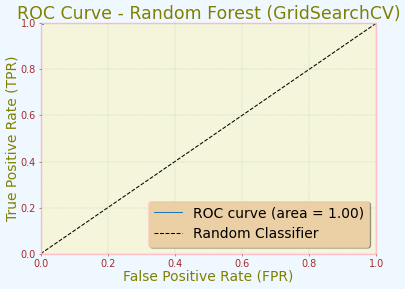

AUC Score of the Best Random Forest Model: 0.9999561574968854


In [23]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set using the best model
y_pred_proba = rf_best_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Import libraries for plotting (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest (GridSearchCV)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC score
print(f"AUC Score of the Best Random Forest Model: {roc_auc}")

In [24]:
# # ROC Curve (replace 'y_score' with your actual predicted probabilities if needed)
# from sklearn.metrics import roc_curve, auc

# y_score = random_forest.predict_proba(X_test)[:, 1]  # Assuming binary classification

# fpr, tpr, _ = roc_curve(y_test, y_score)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-family:Nexa;
           letter-spacing:0.5px">
            <h2 style="padding: 15px;color:white;">2. XGB Classiher</h2>
</div>

In [27]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

In [28]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
xgb_model = xgb.XGBClassifier(objective='binary:logistic',  # Assuming binary classification
                             random_state=42)  # Set random seed for reproducibility
param_grid = {
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 5, 8],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)  # 5-fold cross-validation
xgb_grid_search.fit(X_train, y_train)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_best_model.fit(X_train, y_train)
y_pred_xgb = xgb_best_model.predict(X_test)

xgb_train_accuracy = round(accuracy_score(y_train, xgb_best_model.predict(X_train)) * 100, 2)
xgb_test_accuracy = round(accuracy_score(y_test, y_pred_xgb) * 100, 2)

print(f"Training Accuracy: {xgb_train_accuracy}%")
print(f"Testing Accuracy: {xgb_test_accuracy}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))





KeyboardInterrupt: 

<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Calculate XGBoost F1-score, recall, and precision</h3>

In [ ]:
# Calculate F1-score, recall, and precision
from sklearn.metrics import f1_score, recall_score, precision_score

xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')
xgb_recall = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_precision = precision_score(y_test, y_pred_xgb, average='weighted')

# Print F1-score, recall, and precision with labels
print("\n\033[1mF1-score:\033[0m", f"{xgb_f1:.4f}")  
print("\033[1mRecall:\033[0m", f"{xgb_recall:.4f}") 
print("\033[1mPrecision:\033[0m", f"{xgb_precision:.4f}") 


F1-score: 0.9854
Recall: 0.9853
Precision: 0.9857


<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">XGBoost confusion matrix</h3>

<Figure size 450x350 with 0 Axes>

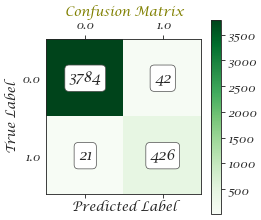

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

# Create and display the confusion matrix with informative labels and colormap
plt.figure(figsize=(9, 7))  # Adjust figure size as desired
plt.matshow(cm, cmap=plt.cm.Greens)  
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=20, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.show()

<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">XGBoost ROC Curve</h3>

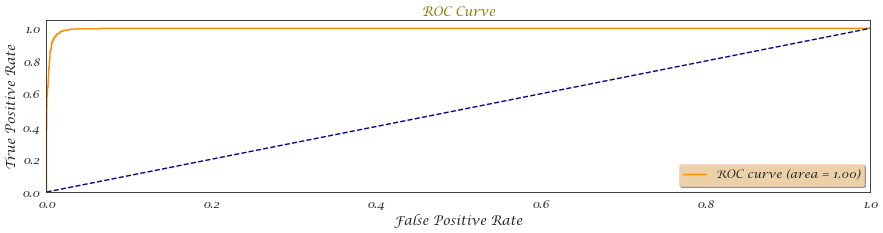

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

y_score = xgb.predict_proba(X_test)[:, 1]  #  binary classification

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

<div style="
            background-color:cyan;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:5px;
            color:Red;
            border-style: solid;
            border-color: red;
            text-align:center;">
<h1>Comparing Multiple Models</h1>
</div>

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Random Forest','XGBClassifier'
    ],
    'Training Accuracy': [
        random_forest_train_accuracy,
        xgb_train_accuracy
    ],
    'Testing Accuracy Score': [
        random_forest_test_accuracy,
        xgb_test_accuracy
    ],
     'F1 Score': [
        random_forest_f1,
        xgb_f1
    ],
     'Precision': [
        random_forest_precision,
        xgb_precision
    ]
    , 'Recall': [
        random_forest_recall,
        xgb_recall
    ]
})


In [ ]:
# pd.set_option('precision',1)
print("model accuracy table")
models.sort_values(by='Testing Accuracy Score', ascending=False)

model accuracy table


Model  Training Accuracy  Testing Accuracy Score  F1 Score  \
1  XGBClassifier              99.94                   98.53  0.985405   
0  Random Forest              99.96                   98.36  0.983837   

   Precision    Recall  
1   0.985670  0.985256  
0   0.984258  0.983618

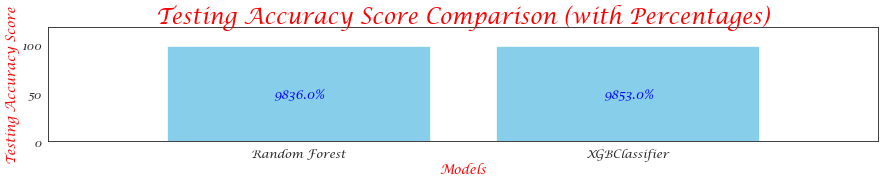

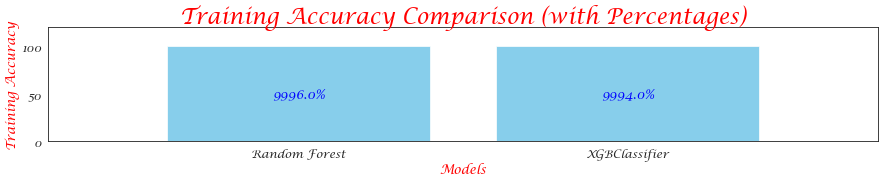

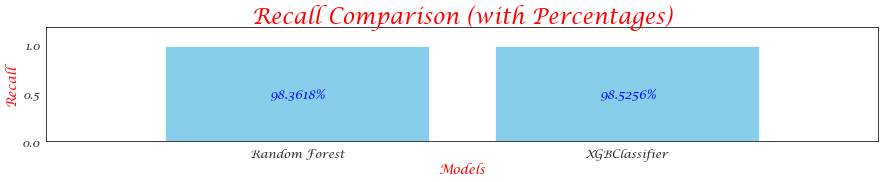

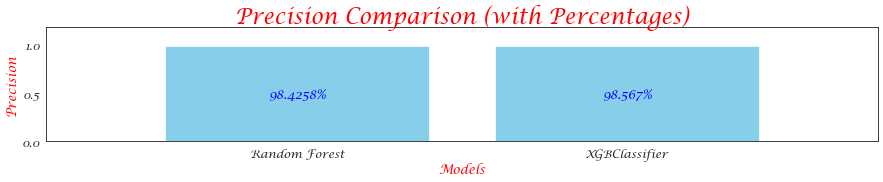

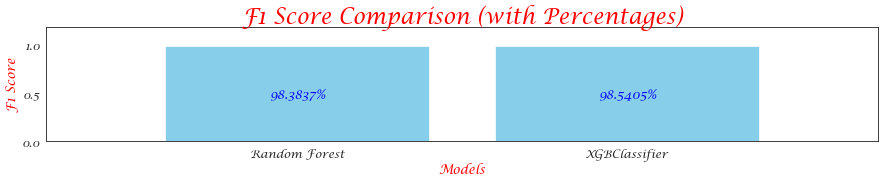

In [ ]:
def create_bar_chart(metric_name, metric_values):

  fig, ax = plt.subplots(figsize=(fig_width, 4)) 

  # Extract model names (assuming "Model" key exists, handle potential absence)
  model_names = models.get("Model", list(models.keys()))  

  # Create the bar chart
  bars = ax.bar(model_names, metric_values, color='skyblue')  # Create bars

  # Round metric values and format as percentages for annotations
  percentages = [f"{round(score * 100, 4)}%" for score in metric_values]  # Calculate percentages, round to 4 decimals, format as strings

  # Annotate percentages on top of bars with centered alignment
  ax.bar_label(bars, percentages, label_type='center',color="blue")

  # Set x-axis labels and title
  ax.set_xlabel('Models',color="red")
  ax.set_ylabel(metric_name,color="red")
  ax.set_title(f'{metric_name} Comparison (with Percentages)', fontsize=30,color="red")


  plt.tight_layout()
  plt.show()

# Create bar charts for Recall, Precision,testing accuracy score and F1 Score
create_bar_chart("Testing Accuracy Score", models["Testing Accuracy Score"])
create_bar_chart("Training Accuracy", models["Training Accuracy"])
create_bar_chart("Recall", models["Recall"])
create_bar_chart("Precision", models["Precision"])
create_bar_chart("F1 Score", models["F1 Score"])



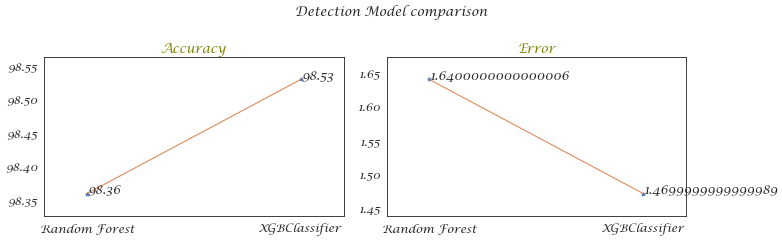

In [ ]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Model comparison')
x = [0,1]

ax[0].set_xticks(x)
ax[0].set_xticklabels(models["Model"])
ax[0].set_title('Accuracy')
ax[0].plot(models["Testing Accuracy Score"],'*')
ax[0].plot(models["Testing Accuracy Score"])
for i in range(len(models["Testing Accuracy Score"])):
    models["Testing Accuracy Score"][i] = round(models["Testing Accuracy Score"][i],4)
for i,j in zip(x,models["Testing Accuracy Score"]):
    ax[0].annotate(str(j),xy=(i,j))

ax[1].set_xticks(x)
ax[1].set_xticklabels(models["Model"])
ax[1].set_title('Error')
ax[1].plot((100-models["Testing Accuracy Score"]),'*')
ax[1].plot((100-models["Testing Accuracy Score"]))
for i in range(len((100-models["Testing Accuracy Score"]))):
    (100-models["Testing Accuracy Score"])[i] = round((100-models["Testing Accuracy Score"])[i],4)
for i,j in zip(x,(100-models["Testing Accuracy Score"])):
    ax[1].annotate(str(j),xy=(i,j))

<b><h2>Cross Checking XGBoost</h2></b>

In [ ]:
prediction_xgb = xgb.predict(X_test)
print(prediction_xgb)


[0 0 0 ... 0 0 0]


In [ ]:
cross_checking_rf= pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_xgb})
cross_checking_rf.sample(20).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LightBlue',
            'font-size': '15px'
        })


<b><h1>Cross Checking Random Forest</h1></b>

In [ ]:
prediction_rf = random_forest.predict(X_test)
print(prediction_rf)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:

cross_checking_rf= pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_rf})
cross_checking_rf.sample(20).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LightBlue',
            'font-size': '15px'
        })